# MoviePy

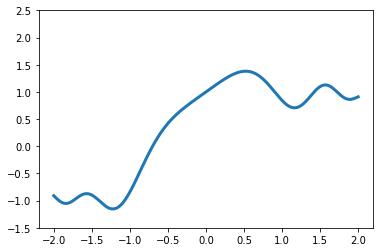

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

x = np.linspace(-2, 2, 200)

duration = 2

fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.plot(x, np.sinc(x**2) + np.sin(x + 2*np.pi/duration * t), lw=3)
    ax.set_ylim(-1.5, 2.5)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
#animation.ipython_display(fps=20, loop=True, autoplay=True)

# Matplotlib Animation

In [53]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

# https://stackoverflow.com/questions/14666439/how-to-set-the-image-resolution-for-animations
# Your resolution is then dpi * w_in_inches X dpi * h_in_inches.
fig.set_size_inches(4, 2)
anim.save('basic_animation.mp4', dpi=300, fps=30, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])

# FFMpegWriter = animation.writers['ffmpeg']
# # Change the video bitrate as you like and add some metadata.
# writer = FFMpegWriter(fps=30, bitrate=1000)
# anim.save('basic_animation.mp4', writer=writer)

from IPython import display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

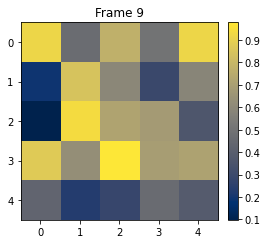

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'

fig = plt.figure()
ax = fig.add_subplot(111)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
data = np.random.rand(5, 5)
im = ax.imshow(data)
cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Frame 0')

cmap = ["copper", 'RdBu_r', 'Oranges', 'cividis', 'hot', 'plasma']

def animate(i):
   cax.cla()
   data = np.random.rand(5, 5)
   im = ax.imshow(data, cmap=cmap[i%len(cmap)])
   fig.colorbar(im, cax=cax)
   tx.set_text('Frame {0}'.format(i))

ani = animation.FuncAnimation(fig, animate, frames=10)
FFwriter = animation.FFMpegWriter()
ani.save('plot.mp4', writer=FFwriter,dpi=300)

In [30]:
animation.FFMpegWriter?

Init signature:
animation.FFMpegWriter(
    fps=5,
    codec=None,
    bitrate=None,
    extra_args=None,
    metadata=None,
)
Docstring:     
Pipe-based ffmpeg writer.

Frames are streamed directly to ffmpeg via a pipe and written in a single
pass.
Init docstring:
Parameters
----------
fps : int, default: 5
    Movie frame rate (per second).
codec : str or None, default: :rc:`animation.codec`
    The codec to use.
bitrate : int, default: :rc:`animation.bitrate`
    The bitrate of the movie, in kilobits per second.  Higher values
    means higher quality movies, but increase the file size.  A value
    of -1 lets the underlying movie encoder select the bitrate.
extra_args : list of str or None, optional
    Extra command-line arguments passed to the underlying movie
    encoder.  The default, None, means to use
    :rc:`animation.[name-of-encoder]_args` for the builtin writers.
metadata : dict[str, str], default: {}
    A dictionary of keys and values for metadata to include in the
   

In [ ]:
FFwriter = animation.FFMpegWriter